In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


[Problem 1] Feature selection for practice

In [32]:
data = np.stack((df['GrLivArea'], df['YearBuilt'], df['SalePrice']),axis=-1)
pd.DataFrame(data, columns=['GrLivArea', 'YearBuilt',"SalePrice"])



,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


[Problem 2] Estimation and evaluation by linear regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
total_data = np.stack((df['GrLivArea'], df['YearBuilt']),axis=-1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(total_data, y, test_size=0.25, random_state=20)
print("X_train")
print(X_train)
print("--------------------------------------")
print("X_test")
print(X_test)
print("--------------------------------------")
print("y_train")
print(y_train)
print("--------------------------------------")
print("y_test")
print(y_test)
print("--------------------------------------")


X_train
[[ 630 1972]
 [1525 2000]
 [1362 1920]
 ...
 [1363 1954]
 [1652 2000]
 [1394 2006]]
--------------------------------------
X_test
[[ 980 1975]
 [1719 1993]
 [ 861 1940]
 [2184 2008]
 [1400 1978]
 [1646 2004]
 [2358 1908]
 [1590 2008]
 [1392 1977]
 [1734 2005]
 [1629 2002]
 [2058 1917]
 [1567 1977]
 [1846 1949]
 [1605 1915]
 [ 864 1972]
 [1096 1969]
 [1306 1940]
 [1414 2004]
 [3395 1914]
 [1054 1969]
 [1603 1992]
 [2036 1965]
 [1339 1958]
 [1978 1968]
 [2019 1910]
 [ 912 1962]
 [1120 1961]
 [1123 1939]
 [ 882 1956]
 [ 988 1950]
 [2520 1995]
 [1301 2006]
 [ 630 1970]
 [1077 1920]
 [1839 1966]
 [ 912 1961]
 [1768 2005]
 [ 848 2004]
 [1801 2005]
 [1795 1954]
 [ 894 1962]
 [1787 2001]
 [1109 1971]
 [1593 2004]
 [1784 1914]
 [ 964 1921]
 [2402 2008]
 [1338 2001]
 [ 980 1967]
 [1374 1920]
 [1739 1999]
 [1646 1941]
 [1728 2004]
 [1554 2006]
 [1962 2006]
 [1048 1956]
 [1208 2007]
 [ 924 1975]
 [ 774 1931]
 [1065 1960]
 [1626 2003]
 [1372 2007]
 [1968 1969]
 [1440 1981]
 [ 988 1969]
 [13

In [88]:
#
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X_train))
print(scaler.mean_)
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)
print(X_train_transform)
print(X_test_transform)
print('------------------------')

StandardScaler()
[1515.58356164 1970.95159817]
[[-1.65283379  0.03465924]
 [ 0.01757463  0.96031465]
 [-0.286645   -1.68441508]
 ...
 [-0.28477862 -0.56040494]
 [ 0.25460466  0.96031465]
 [-0.2269209   1.15866938]]
[[-9.99601445e-01  1.33836608e-01]
 [ 3.79651991e-01  7.28900796e-01]
 [-1.22170044e+00 -1.02323265e+00]
 [ 1.24751782e+00  1.22478762e+00]
 [-2.15722631e-01  2.33013973e-01]
 [ 2.43406388e-01  1.09255113e+00]
 [ 1.57226762e+00 -2.08112454e+00]
 [ 1.38889213e-01  1.22478762e+00]
 [-2.30653656e-01  1.99954851e-01]
 [ 4.07647663e-01  1.12561025e+00]
 [ 2.11677960e-01  1.02643289e+00]
 [ 1.01235418e+00 -1.78359244e+00]
 [ 9.59625160e-02  1.99954851e-01]
 [ 6.16682014e-01 -7.25700552e-01]
 [ 1.66884885e-01 -1.84971069e+00]
 [-1.21610131e+00  3.46592434e-02]
 [-7.83101582e-01 -6.45181212e-02]
 [-3.91162175e-01 -1.02323265e+00]
 [-1.89593338e-01  1.09255113e+00]
 [ 3.50770173e+00 -1.88276981e+00]
 [-8.61489464e-01 -6.45181212e-02]
 [ 1.63152129e-01  6.95841675e-01]
 [ 9.71293858e-

In [89]:
#Linear regression
regressor = LinearRegression()
regressor.fit(X_train_transform, y_train)
y_pred = regressor.predict(X_test_transform)
y_pred

array([135641.42706963, 222683.32972628,  87897.84530801, 281312.55006003,
       177514.2109693 , 227510.4060113 , 192289.24940378, 226550.21898738,
       175726.02324111, 236673.99186376, 223841.83807837, 174087.33767968,
       191859.70663794, 188163.26595488, 130222.84996952, 121795.15604215,
       140031.86685522, 128923.49737422, 206121.75145094, 294196.73508412,
       136159.78283998, 210938.35453033, 222490.20315224, 150877.51158425,
       220294.98325945, 163137.29568375, 115713.91575906, 133839.30296638,
       111001.6262492 , 106644.25396787, 110112.76898793, 298630.79927698,
       197805.29743195,  98120.82069716,  86798.46192821, 205378.93318701,
       114663.26784329, 239808.53606657, 153940.80972179, 242850.88779283,
       188714.68922948, 114054.4511811 , 237357.60145802, 143331.66488194,
       222624.20475398, 145674.65535679,  77431.35999346, 301410.50994864,
       195963.1794856 , 127236.24374351, 114179.62746454, 230831.06675193,
       161319.5873181 , 2

In [90]:
#estimation
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_neigh_3  = KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(X_train_transform,y_train)
pre_3 = k_neigh_3.predict(X_test_transform)
print(pre_3)
k_neigh_5 = KNeighborsClassifier(n_neighbors=5)
k_neigh_5.fit(X_train_transform,y_train)
pre_5 = k_neigh_5.predict(X_test_transform)
print(pre_5)
k_neigh_1 = KNeighborsClassifier(n_neighbors=1)
k_neigh_1.fit(X_train_transform,y_train)
pre_1 = k_neigh_1.predict(X_test_transform)
print(pre_1)

[128000 187000  91300 280000 148500 173000 104000 235128 159500 196500
 195000 130000 155000 124500 128000 111250  88000 105000 178740 197000
 138500 178000 135000 120000 135000 122000 115000 131400  95000  97000
 109900 290000 176432  75500  68400 187000 106500 283463 141000 147000
 155000 106500 223500  88000 221500 135900 100000 325300 179000 108000
  89500 185000 117000 183500 174000 250000 128900 194000 128200  76000
 133700 173000 146000 135000 148500 106000 120000 127000 180000 140000
 118858  81000 236000 160000  99500 164990 132000  98600 127500 290000
 281213  91300 122500 132500 173500 155835 113000  97000  79900 199900
 133700 124000 185000 159500 230000 185000 120000 123000 134000 117000
 190000 141000 109900 177000 155835  68400 174000  55000  79900 345000
 204900 215200  93500 424870 179500 170000 133000 269500 160000 125000
 177000 110000 202900 155000 236000 216500 138000 164000 125000 143000
 108000 107500 122500 155000  84500 125000 173000 115000 320000 207500
  8540

In [93]:
# Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
pred = [pre_3,pre_1,pre_5]
keys = ["knn3","knn1","knn5"]
for a , prediction in enumerate(pred,0):
    print("prediction of " , keys[a])
    print("accuracy_score " , accuracy_score(y_true = y_test , y_pred =prediction ))
    print("precision_score of " , precision_score(y_true = y_test, y_pred=prediction, average=None))
    print("recall_score of " , recall_score(y_true= y_test, y_pred=prediction, average=None))
    print("f1_score of " , f1_score(y_true= y_test, y_pred=prediction, average=None))
    print("confusion_matrix of " ,confusion_matrix(y_true= y_test, y_pred=prediction))
    

prediction of  knn3
accuracy_score  0.0136986301369863
precision_score of  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

/home/sonko/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sonko/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sonko/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sonko/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: Un

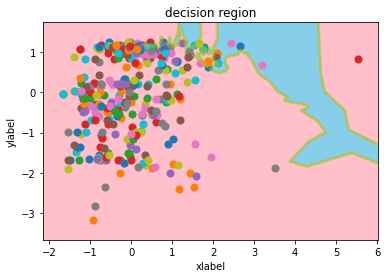

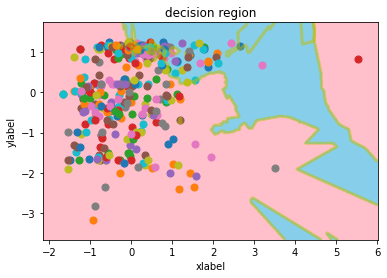

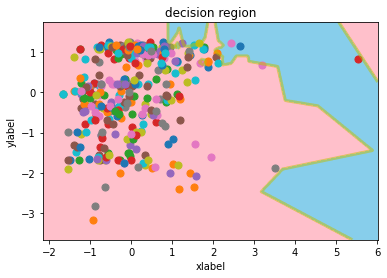

In [108]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['GrLivArea', 'YearBuilt']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=50, marker='o')

    plt.show()
models = [k_neigh_3,k_neigh_5,k_neigh_1]
for a ,model in enumerate(models,1):    
    decision_region(X_test_transform,y_test,model)


[Problem 3] Comparison of methods

In [109]:
# def display_out(title , pred, model ,std):
#     print(title)
#     print("prediction of " , pred)
#     print("accuracy_score " , accuracy_score(y_true = y_test , y_pred =pred ))
#     print("precision_score of " , precision_score(y_true = y_test, y_pred=pred, average=None))
# #     print("recall_score of " , recall_score(y_true= y_test, y_pred=pred, average=None))
# #     print("f1_score of " , f1_score(y_true= y_test, y_pred=pred, average=None))
# #     print("confusion_matrix of " ,confusion_matrix(y_true= y_test, y_pred=pred))
# #     if std== True:
# #         decision_region(X_test_trans ,y_test,model)
# #     else:
# #         decision_region(X_test ,y_test,model)
        

In [110]:
# #Linear regression
# from sklearn.linear_model import LogisticRegression
# regressor = LinearRegression()
# regressor.fit(X_train_transform, y_train)
# y_pred = regressor.predict(X_test_transform)
# display_out("Linear Regression",y_pred,regressor,std=True)

In [ ]:
#SVM
#Decision tree
#Random forest